In [ ]:
#

## Avocado Data Analysis

## Business Understanding
The aim of this project is to answer the following four questions:
    1. Which region are the lowest and highest prices of Avocado?
    2. What is the highest region of avocado production?
    3. What is the average avocado prices in each year?
    4. What is the average avocado volume in each year?

## Data Understanding

The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

This dataset contains 13 columns:
    1. Date - The date of the observation
    2. AveragePrice: the average price of a single avocado
    3. Total Volume: Total number of avocados sold
    4. Total Bags: Total number  o bags
    5. Small Bags: Total number of Small bags
    6. Large Bags: Total number of Large bags
    7. XLarge Bags: Total number of XLarge bags
    8. type: conventional or organic
    9. year: the year
    10. region: the city or region of the observation
    11. 4046: Total number of avocados with PLU 4046 sold
    12. 4225: Total number of avocados with PLU 4225 sold
    13. 4770: Total number of avocados with PLU 4770 sold


In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt        
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Data Preparation

In [3]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\rahee\OneDrive\Desktop\FSDS_AI\27th - REGRESSION PROJECT\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")

In [4]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
#Dropping unnecessary columns
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [10]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Answering The Questions

In [11]:
def get_average(df,column):
    """
    Description::This function to return the average value of the specified column in the DataFrame.

    Arguments:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which to calculate the average.

    Returns:
         column_average (float): The average value of the specified column.


    """
    return sum(df[column]) / len(df[column])


In [49]:
def get_average_between_two_columns(df,column1,column2):
    """
    Description::This function to return the average value of the specified column in the DataFrame.

    Arguments:
        df (pd.DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column for which to calculate the average.
        column2 (str): The name of the second column for which to calculate the average.

    Returns:
         column_average (float): The average value of the specified column.


    """
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average=get_average(x,column2)
        average.append(column1_average)
    df_column1_column2= pd.DataFrame({column1:List,column2:average})
    column1_column2_sorted_index=df_column1_column2.sort_values(by=column2,ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    return column1_column2_sorted_data

In [58]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data[xlabel],y=data[ylabel],palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

## Which region has the highest average price of avocado?
"

C:\Users\rahee\AppData\Local\Temp\ipykernel_57072\2146783639.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data[xlabel],y=data[ylabel],palette='rocket')


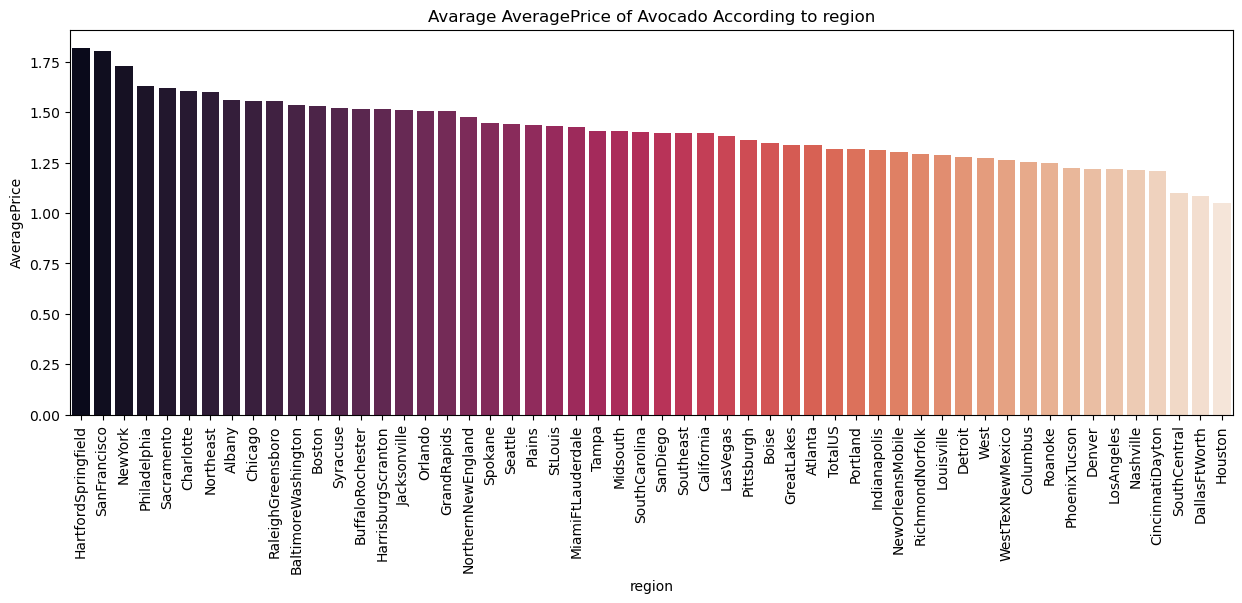

In [59]:
data1= get_average_between_two_columns(df,'region','AveragePrice')
plot(data1,'region','AveragePrice')

In [63]:
print(data1['AveragePrice'].iloc[-1],"is the region producing avacado with the lowest price.")

1.0479289940828402 is the region producing avacado with the lowest price.


## What is the highest region of avacado production?

Checking if there are any outliers 

Text(0.5, 1.0, 'Total Volume of Avocado According to Region')

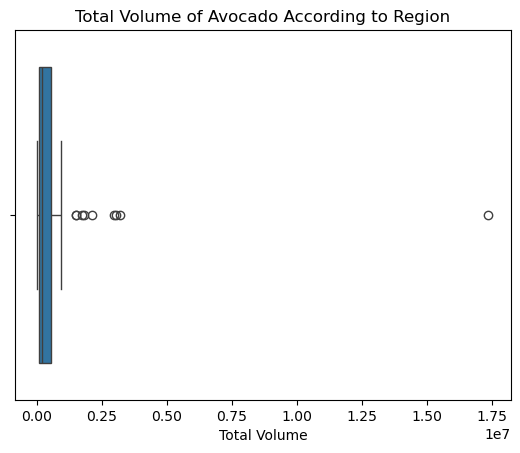

In [64]:
data2=get_average_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2['Total Volume']).set_title('Total Volume of Avocado According to Region')   

In [65]:
outliers_region=data2[data2['Total Volume']>1000000]
print("The region with the highest production of avocados is:", outliers_region['region'].iloc[0])

The region with the highest production of avocados is: TotalUS


In [66]:
#Remove the outliers values
outliers_region.index
data2=data2.drop(outliers_region.index)

C:\Users\rahee\AppData\Local\Temp\ipykernel_57072\2146783639.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data[xlabel],y=data[ylabel],palette='rocket')


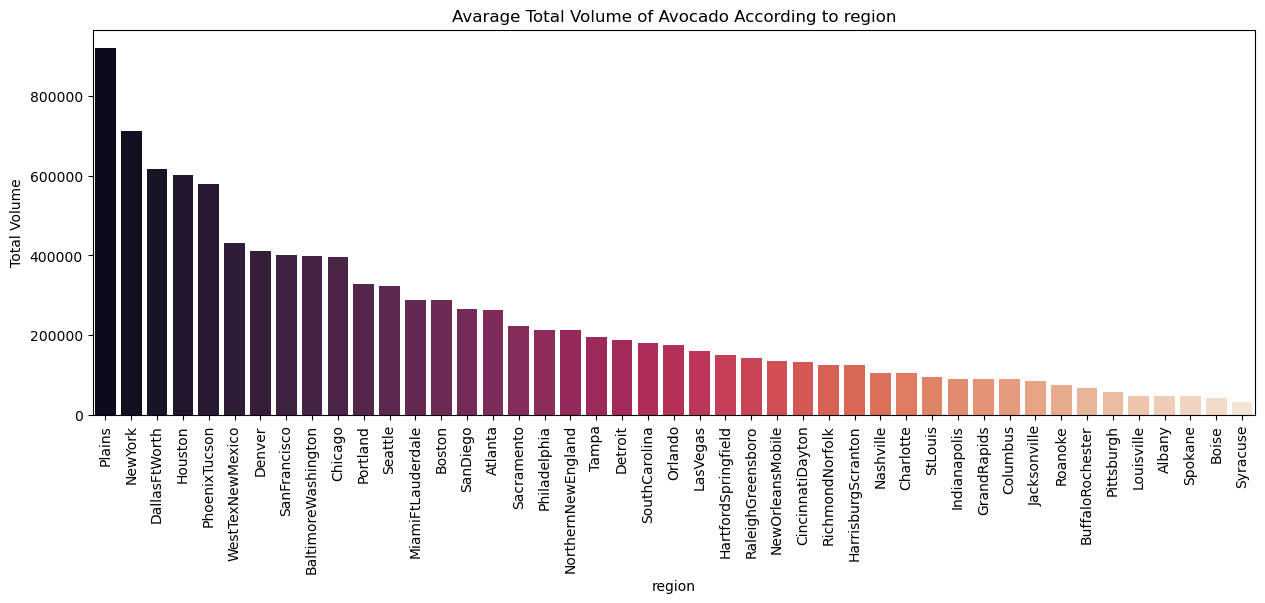

In [67]:
plot(data2,'region','Total Volume')

## What is the average avocado prices in each year?

C:\Users\rahee\AppData\Local\Temp\ipykernel_57072\2146783639.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data[xlabel],y=data[ylabel],palette='rocket')


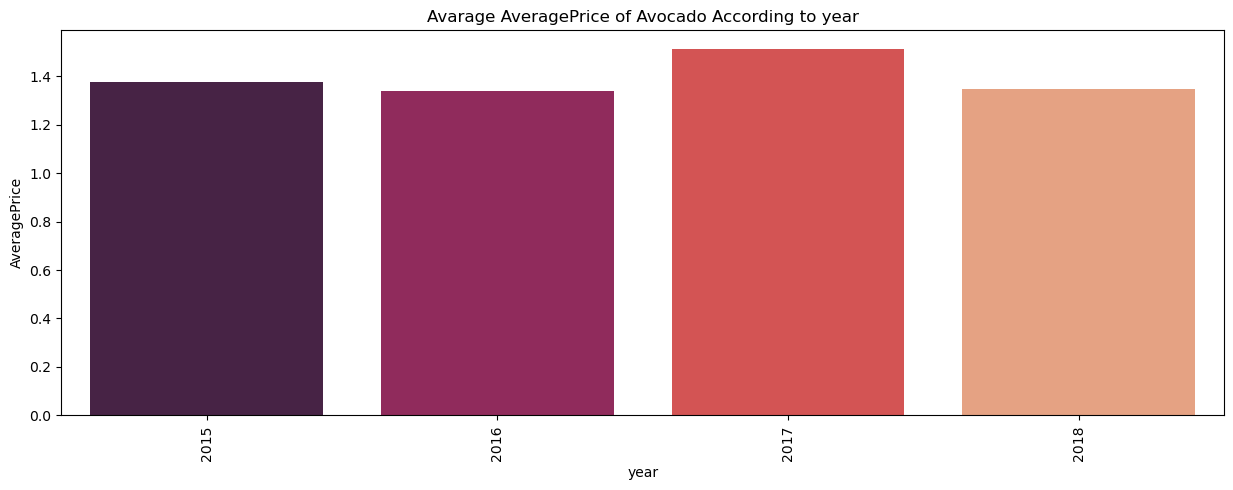

In [69]:
data3=get_average_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','AveragePrice')

## What  is the average Avocado volume in each year?

C:\Users\rahee\AppData\Local\Temp\ipykernel_57072\2146783639.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data[xlabel],y=data[ylabel],palette='rocket')


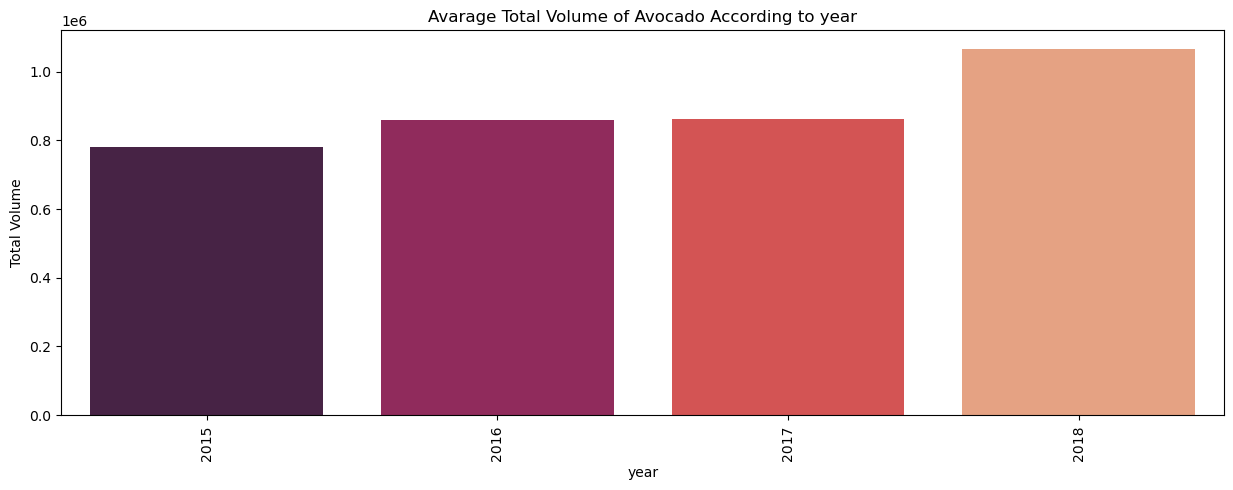

In [70]:
data4=get_average_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Total Volume')

## Data Modeling
We built the regression model used Linear Regresiong from sklearn to predict the avocado price 

## Changing Some colunmn type to categories

In [71]:
df['region'] = df['region'].astype('category')
df['type'] = df['type'].astype('category')
df['region'] = df['region'].cat.codes
df['type'] = df['type'].cat.codes


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [74]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [75]:
#split data into x and y
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']                  

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [77]:
print("training set:",X_train.shape,'-',y_train.shape,'samples')
print("testing set:",X_test.shape,'-',y_test.shape,'samples')

training set: (12774, 8) - (12774,) samples
testing set: (5475, 8) - (5475,) samples


In [79]:
#Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the results 

In [80]:
#predicting the values and evaluating the model accuracy
test_pre=model.predict(X_test)
test_score=r2_score(y_test, test_pre)
print("the accuracy of modelis:", test_score*100)

the accuracy of modelis: 38.580741764370785


In [81]:
## prediction and calculate the accuracy for the testing dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.706860424108356


The model doesn't work well with this dataset, In order to the avocado prices were near together